In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\6_censusIncome\census_income.csv")
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [4]:
df.shape

(32560, 15)

In [5]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no missing values in our dataset

In [7]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

# EDA

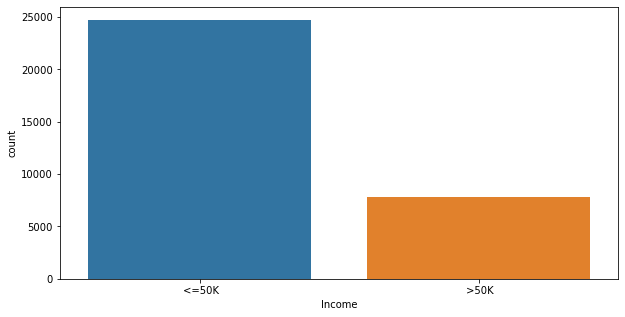

In [8]:
plt.figure(figsize=(10,5))
ax=sn.countplot(df["Income"])

We have to balance the classes.

## Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
objList = df.select_dtypes(include = "object").columns

In [11]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

## Seperating Income

In [12]:
dfA=df["Income"]

In [13]:
df.drop(columns={"Income"},inplace=True)

## Scaling the data

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

## Adding Income column again

In [15]:
frames = [df, dfA]

df = pd.concat(frames,axis=1)

## Distplot

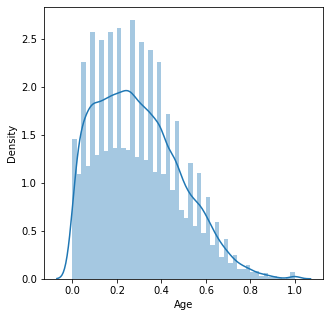

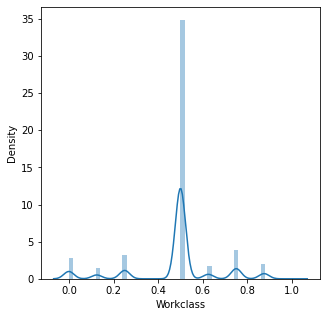

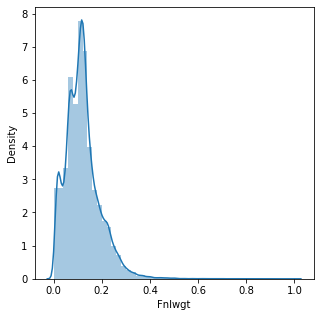

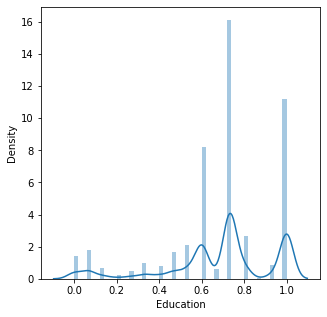

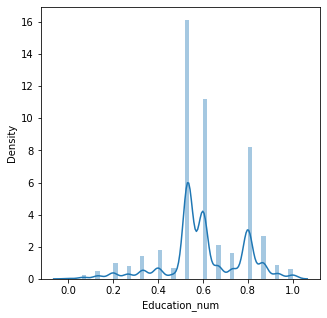

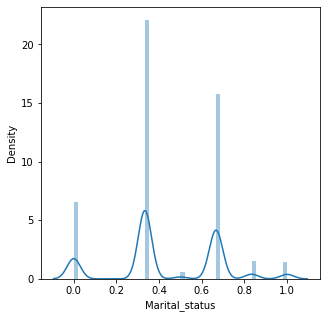

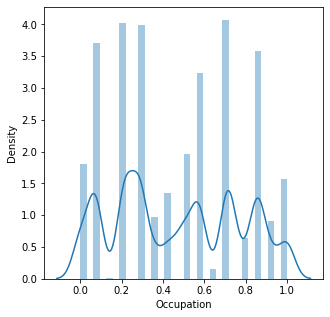

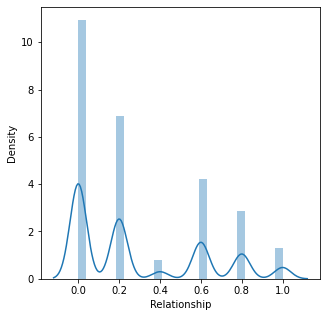

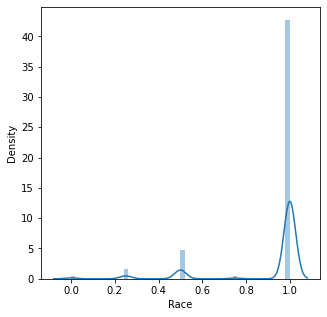

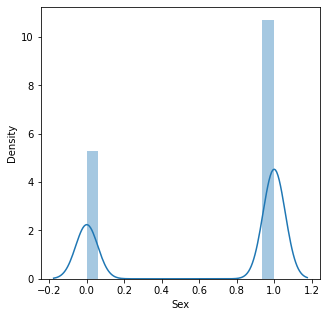

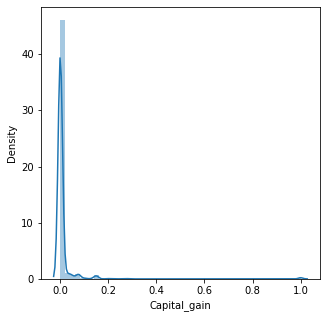

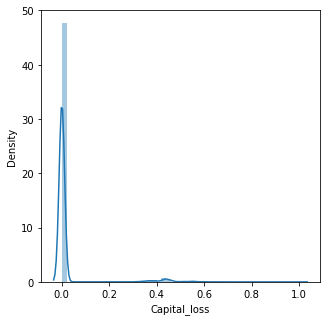

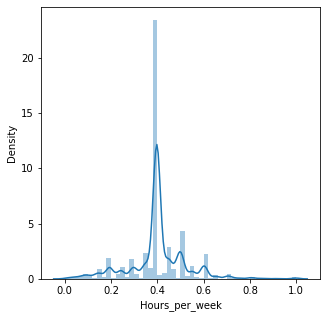

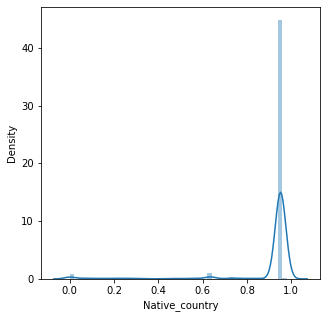

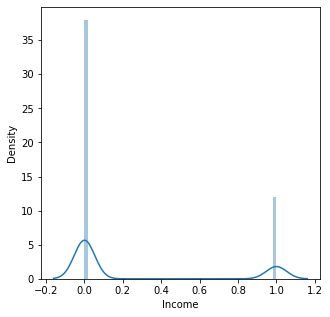

In [16]:
for column in df:
        plt.figure(figsize=(5,5))
        sn.distplot(df[column])

Some Skewness is present in various columns which we will handle later.

## Boxplot

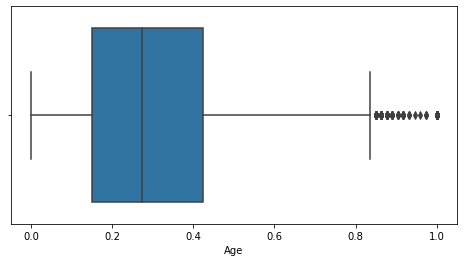

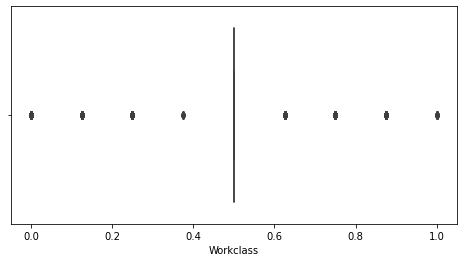

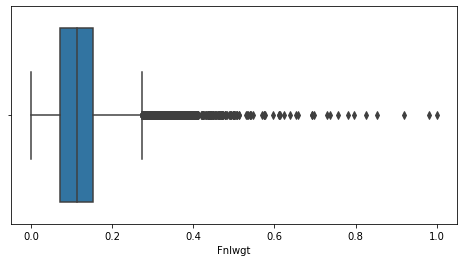

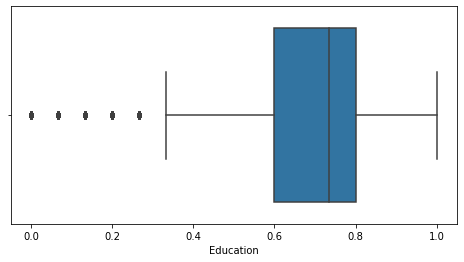

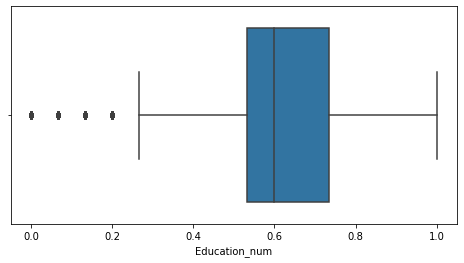

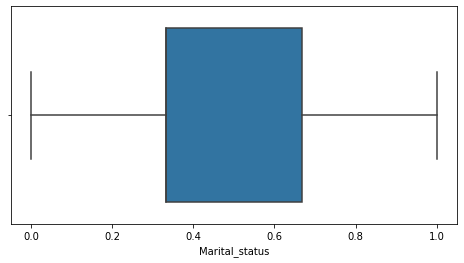

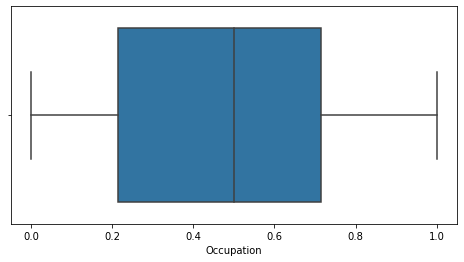

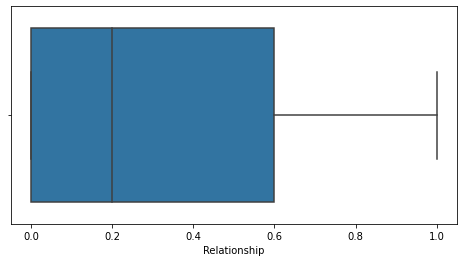

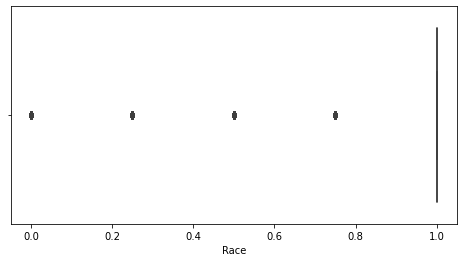

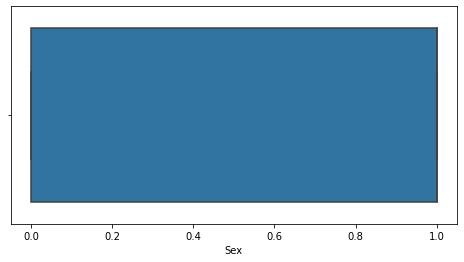

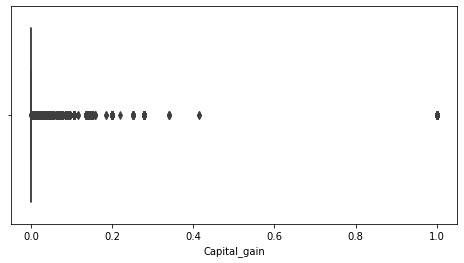

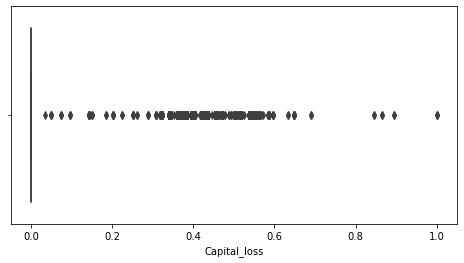

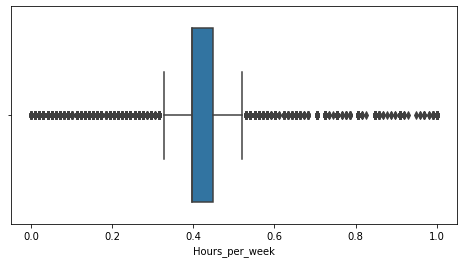

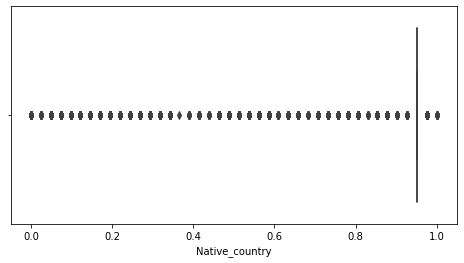

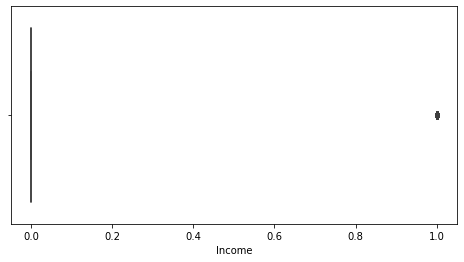

In [17]:
for column in df:
        plt.figure(figsize=(8,4))
        sn.boxplot(x=column,data=df)

Some columns have a high amount of outliers in them

## Pairplot

In [18]:
df

Age  Workclass    Fnlwgt  Education  Education_num  \
0      0.452055      0.750  0.048238   0.600000       0.800000   
1      0.287671      0.500  0.138113   0.733333       0.533333   
2      0.493151      0.500  0.151068   0.066667       0.400000   
3      0.150685      0.500  0.221488   0.600000       0.800000   
4      0.273973      0.500  0.184932   0.800000       0.866667   
...         ...        ...       ...        ...            ...   
32555  0.136986      0.500  0.166404   0.466667       0.733333   
32556  0.315068      0.500  0.096500   0.733333       0.533333   
32557  0.561644      0.500  0.094827   0.733333       0.533333   
32558  0.068493      0.500  0.128499   0.733333       0.533333   
32559  0.479452      0.625  0.187203   0.733333       0.533333   

       Marital_status  Occupation  Relationship  Race  Sex  Capital_gain  \
0            0.333333    0.285714           0.0   1.0  1.0      0.000000   
1            0.000000    0.428571           0.2   1.0  1.0      0.000000   
2            0.333333    0.428571           0.0   0.5  1.0      0.000000   
3            0.333333    0.714286           1.0   0.5  0.0      0.000000   
4            0.333333    0.285714           1.0   1.0  0.0      0.000000   
...               ...         ...           ...   ...  ...           ...   
32555        0.333333    0.928571           1.0   1.0  0.0      0.000000   
32556        0.333333    0.500000           0.0   1.0  1.0      0.000000   
32557        1.000000    0.071429           0.8   1.0  0.0      0.000000   
32558        0.666667    0.071429           0.6   1.0  1.0      0.000000   
32559        0.333333    0.285714           1.0   1.0  0.0      0.150242   

       Capital_loss  Hours_per_week  Native_country  Income  
0               0.0        0.122449        0.951220       0  
1               0.0        0.397959        0.951220       0  
2               0.0        0.397959        0.951220       0  
3               0.0        0.397959        0.121951       0  
4               0.0        0.397959        0.951220       0  
...             ...             ...             ...     ...  
32555           0.0        0.377551        0.951220       0  
32556           0.0        0.397959        0.951220       1  
32557           0.0        0.397959        0.951220       0  
32558           0.0        0.193878        0.951220       0  
32559           0.0        0.397959        0.951220       1  

[32560 rows x 15 columns]

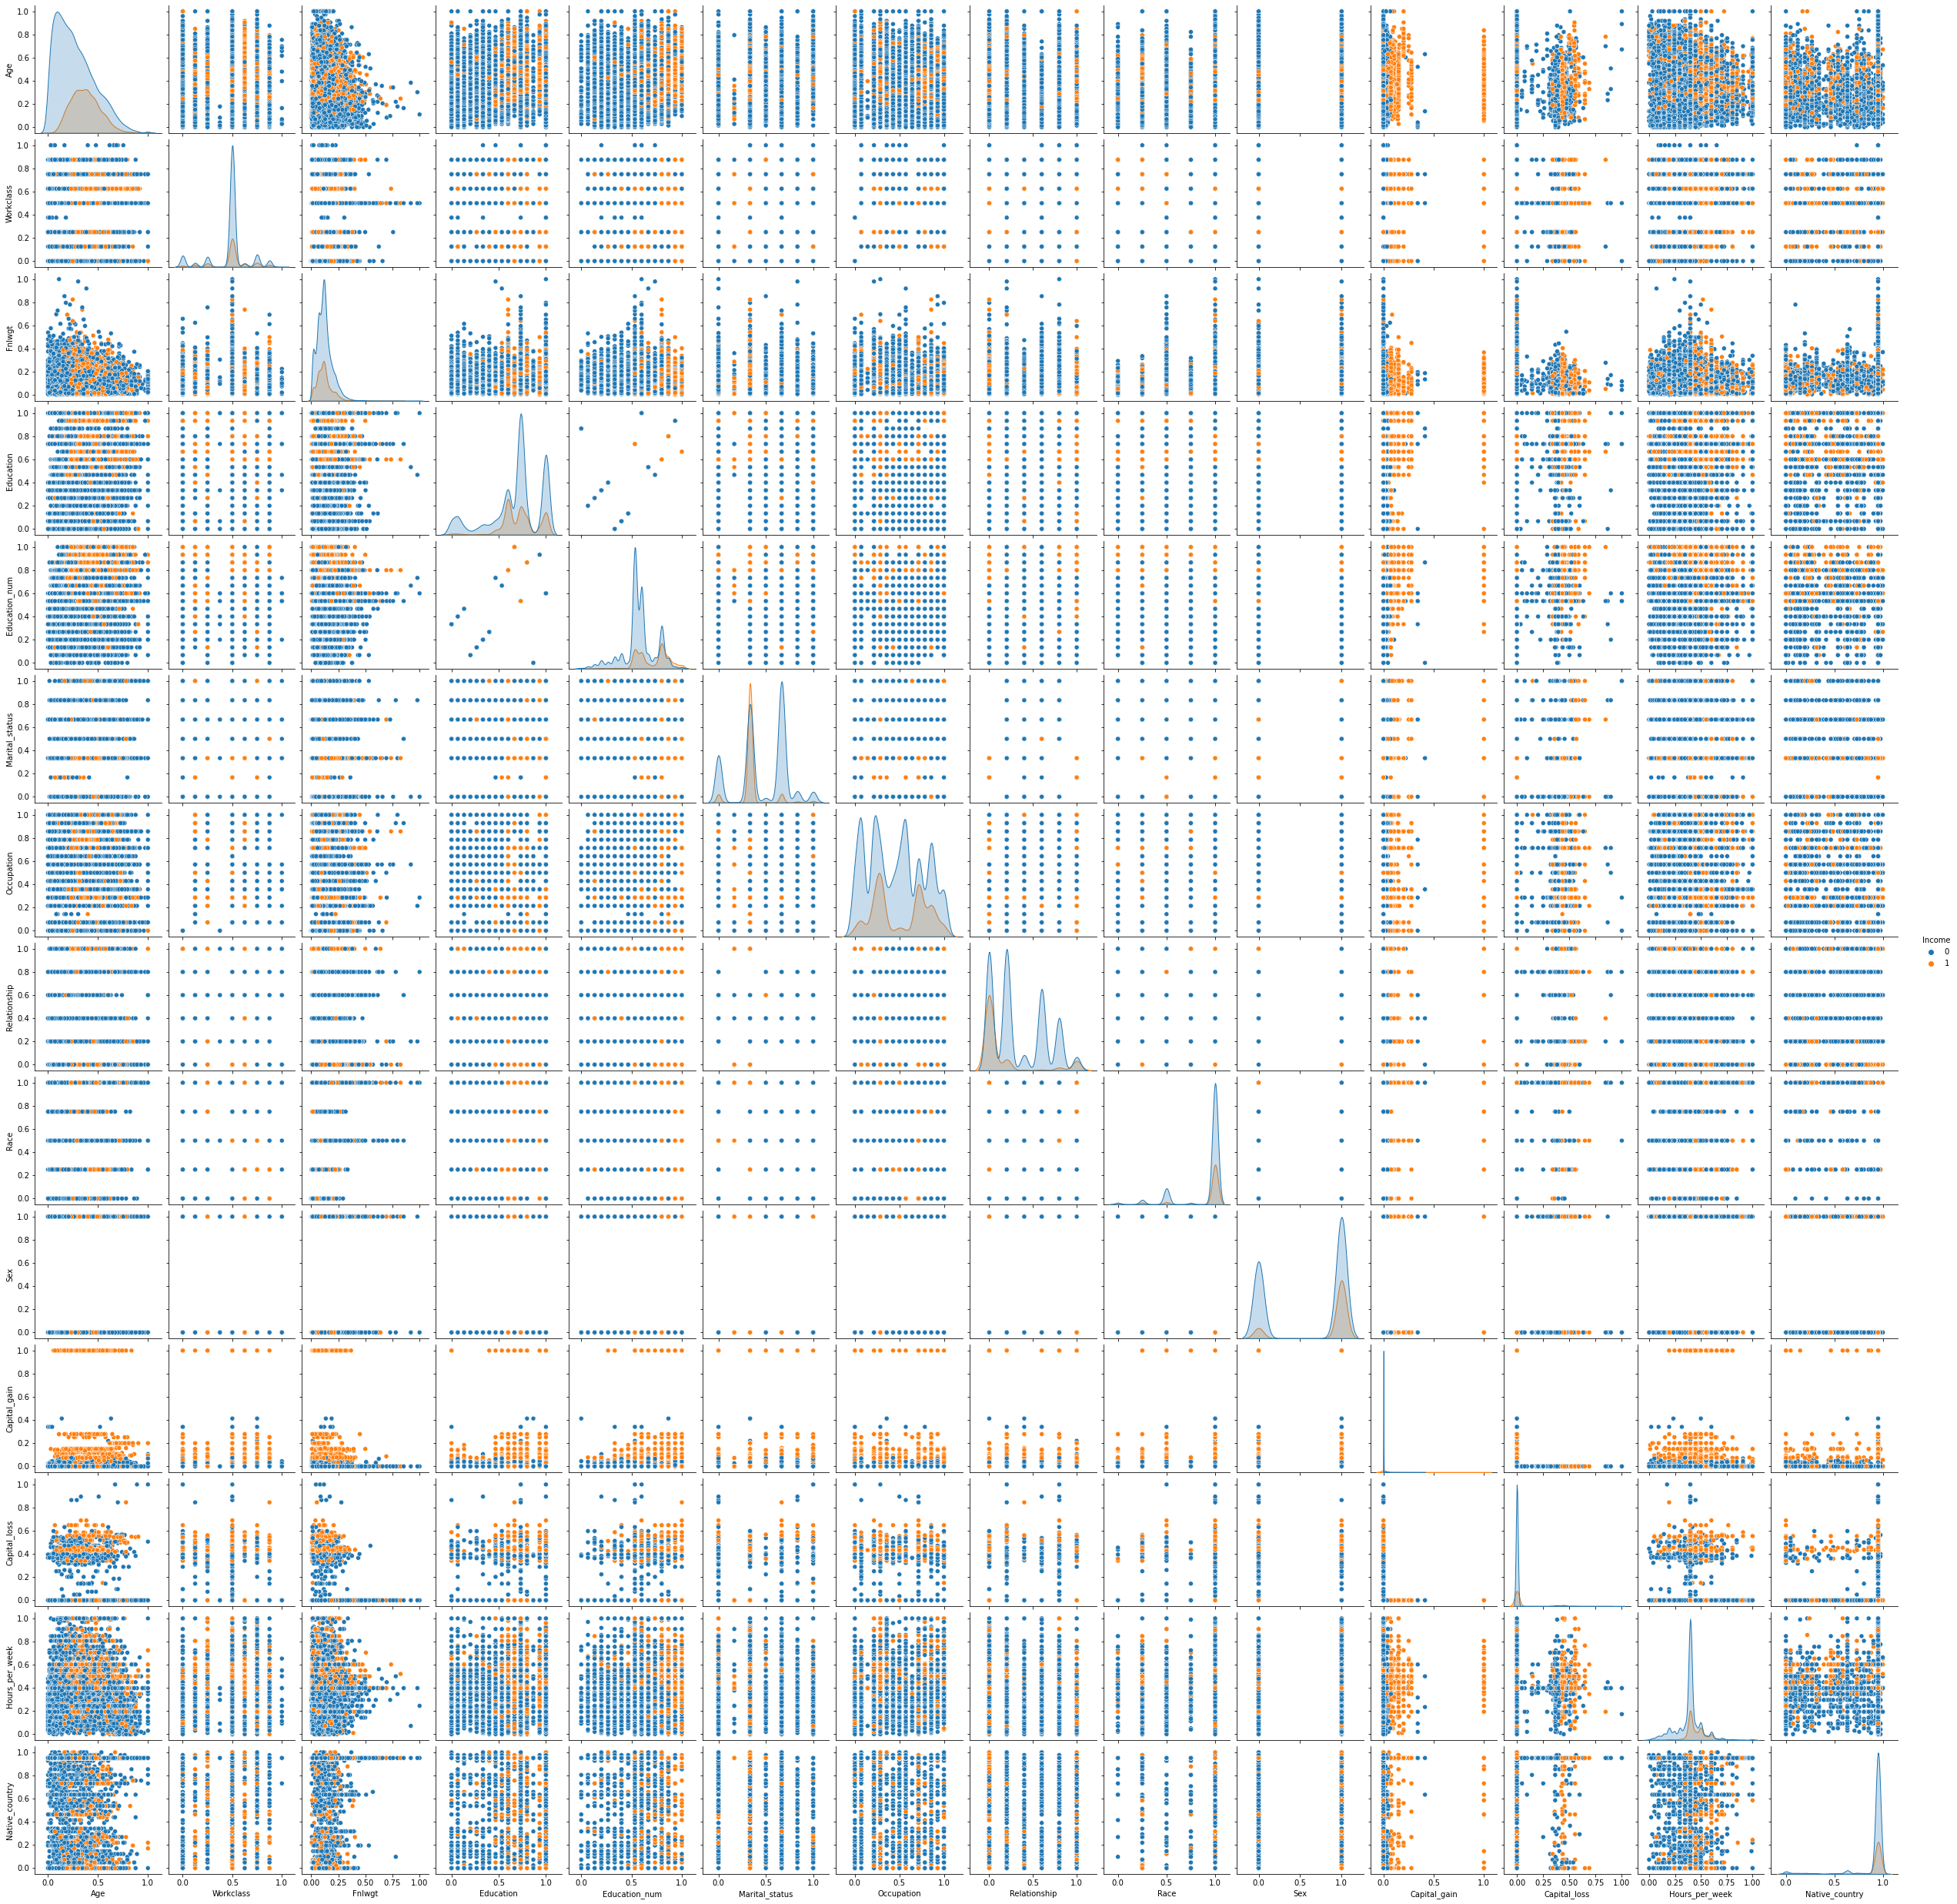

In [19]:
sn.pairplot(data=df,hue="Income")

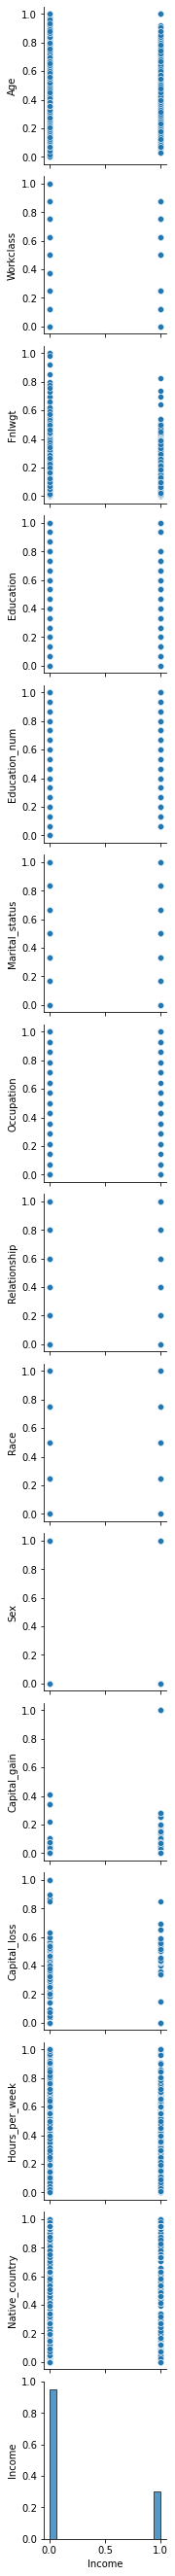

In [20]:
sn.pairplot(data=df,
            x_vars=['Income'],
            y_vars=df.columns,)

## Heatmap

In [21]:
df.corr()

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.003786 -0.076646  -0.010508       0.036527   
Workclass       0.003786   1.000000 -0.016587   0.023537       0.052015   
Fnlwgt         -0.076646  -0.016587  1.000000  -0.028156      -0.043159   
Education      -0.010508   0.023537 -0.028156   1.000000       0.359172   
Education_num   0.036527   0.052015 -0.043159   0.359172       1.000000   
Marital_status -0.266292  -0.064798  0.028184  -0.038398      -0.069338   
Occupation     -0.020946   0.255004  0.001554  -0.021274       0.109748   
Relationship   -0.263698  -0.090449  0.008922  -0.010879      -0.094145   
Race            0.028718   0.049720 -0.021278   0.014135       0.031825   
Sex             0.088832   0.095942  0.026882  -0.027349       0.012256   
Capital_gain    0.077674   0.033828  0.000437   0.030047       0.122627   
Capital_loss    0.057775   0.012231 -0.010259   0.016744       0.079932   
Hours_per_week  0.068756   0.138974 -0.018770   0.055510       0.148127   
Native_country -0.001151  -0.007710 -0.051957   0.064291       0.050831   
Income          0.234039   0.051645 -0.009481   0.079311       0.335182   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.266292   -0.020946     -0.263698  0.028718  0.088832   
Workclass            -0.064798    0.255004     -0.090449  0.049720  0.095942   
Fnlwgt                0.028184    0.001554      0.008922 -0.021278  0.026882   
Education            -0.038398   -0.021274     -0.010879  0.014135 -0.027349   
Education_num        -0.069338    0.109748     -0.094145  0.031825  0.012256   
Marital_status        1.000000   -0.009617      0.185461 -0.068025 -0.129337   
Occupation           -0.009617    1.000000     -0.075620  0.006779  0.080328   
Relationship          0.185461   -0.075620      1.000000 -0.116052 -0.582453   
Race                 -0.068025    0.006779     -0.116052  1.000000  0.087197   
Sex                  -0.129337    0.080328     -0.582453  0.087197  1.000000   
Capital_gain         -0.043398    0.025511     -0.057918  0.011143  0.048477   
Capital_loss         -0.034182    0.017979     -0.061064  0.018902  0.045572   
Hours_per_week       -0.190521    0.080384     -0.248975  0.041910  0.229312   
Native_country       -0.023827   -0.012532     -0.005504  0.137849 -0.008125   
Income               -0.199295    0.075448     -0.250924  0.071853  0.215995   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.077674      0.057775        0.068756       -0.001151   
Workclass           0.033828      0.012231        0.138974       -0.007710   
Fnlwgt              0.000437     -0.010259       -0.018770       -0.051957   
Education           0.030047      0.016744        0.055510        0.064291   
Education_num       0.122627      0.079932        0.148127        0.050831   
Marital_status     -0.043398     -0.034182       -0.190521       -0.023827   
Occupation          0.025511      0.017979        0.080384       -0.012532   
Relationship       -0.057918     -0.061064       -0.248975       -0.005504   
Race                0.011143      0.018902        0.041910        0.137849   
Sex                 0.048477      0.045572        0.229312       -0.008125   
Capital_gain        1.000000     -0.031614        0.078409       -0.001984   
Capital_loss       -0.031614      1.000000        0.054256        0.000420   
Hours_per_week      0.078409      0.054256        1.000000       -0.002671   
Native_country     -0.001984      0.000420       -0.002671        1.000000   
Income              0.223333      0.150523        0.229690        0.015845   

                  Income  
Age             0.234039  
Workclass       0.051645  
Fnlwgt         -0.009481  
Education       0.079311  
Education_num   0.335182  
Marital_status -0.199295  
Occupation      0.075448  
Relationship   -0.250924  
Race            0.071853  
Sex             0.21

<AxesSubplot:>

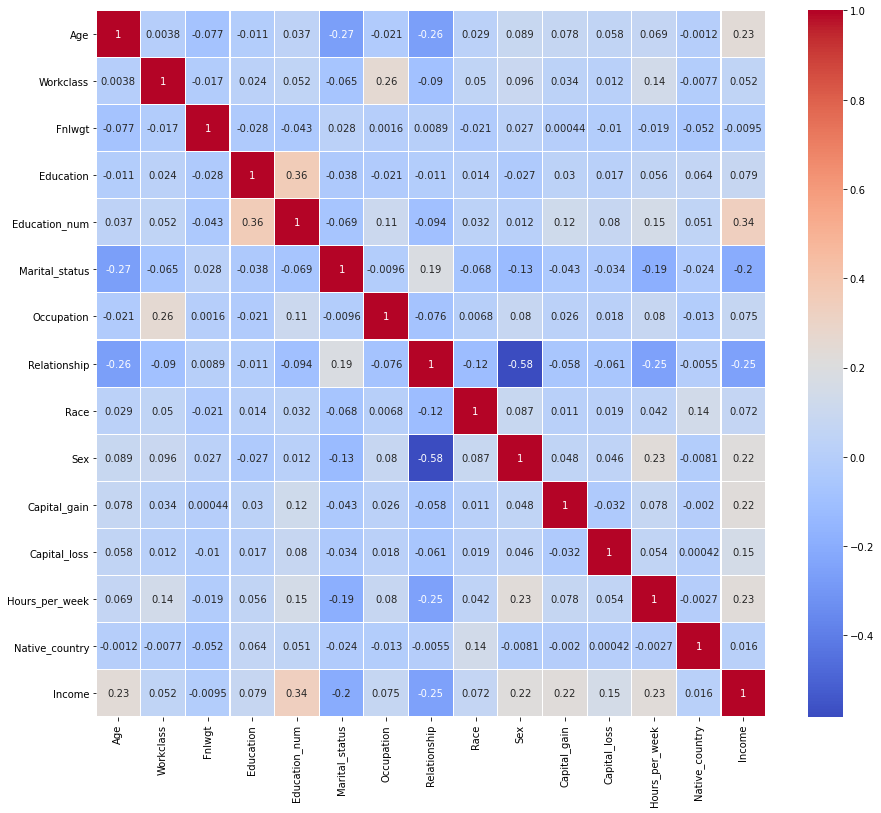

In [22]:
plt.figure(figsize=(15,13))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

We have to drop Relationship,Education becaus it has a high correlation with sex.

In [23]:
df=df.drop(columns={"Relationship","Education"},axis=1)

# Removing Outliers

In [24]:
from scipy.stats import zscore

In [25]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [26]:
df.shape

(27417, 13)

# Skewness Removal

In [27]:
df.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
Income             1.324919
dtype: float64

In [28]:
from scipy.stats import boxcox

### Race

In [29]:
r=boxcox(df["Race"]+1)[0]
pd.Series(r).skew()

-2.5334756574094968

In [30]:
df["Race"]=r

### Capital_gain

In [31]:
c=boxcox(df["Capital_gain"]+1)[0]
pd.Series(c).skew()

3.0857930750804328

In [32]:
df["Capital_gain"]=c

### Capital_loss

In [33]:
l=np.log(df["Capital_loss"]+1)
l.skew()

28.798126554632862

# Input Splitting

In [34]:
x=df.drop(["Income"],axis=1)

In [35]:
y=df["Income"]

# Oversampling our data

In [63]:
from imblearn.over_sampling import RandomOverSampler

In [64]:
ros=RandomOverSampler(random_state=0)

In [65]:
x,y=ros.fit_resample(x,y)

# Finding The Best Model

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [67]:
#classify function
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.20,random_state=343)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("Accuracy:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [68]:
DTC = DecisionTreeClassifier()
classify(DTC,x,y)

Accuracy: 81.78106734807767
CV Score: 92.36574042172757
Diffrence: 10.584673073649896


In [69]:
RC = RidgeClassifier()
classify(RC,x,y)

Accuracy: 74.72611390137163
CV Score: 74.74976766025037
Diffrence: 0.023653758878737108


In [70]:
RFC = RandomForestClassifier()
classify(RFC,x,y)

Accuracy: 85.49651951713807
CV Score: 93.6416387395171
Diffrence: 8.145119222379037


In [71]:
KNN = KNeighborsClassifier()
classify(KNN,x,y)

Accuracy: 79.56060739565895
CV Score: 83.23466927585088
Diffrence: 3.6740618801919283


In [72]:
ETC = ExtraTreesClassifier()
classify(ETC,x,y)

Accuracy: 85.05595206626134
CV Score: 94.65908531241745
Diffrence: 9.603133246156105


RandomForestClassifier is our Best Model

# Hyper parameter tuning

In [73]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
params = {'n_estimators': [10,50,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,8,16,32,50],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2],
    'oob_score': [True, False],
    'max_features': ['auto','sqrt','log2'],    
    'bootstrap': [True, False],
    'warm_start': [True, False]}

In [76]:
gs = GridSearchCV(ETC, params, verbose = 1, cv=3, n_jobs = -1)

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
gs.fit(X_train, Y_train)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 8, 16, 32, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             verbose=1)

In [78]:
gs.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 32,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'oob_score': False,
 'warm_start': False}

# Checking Accuracy Score

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [79]:
RFC=RandomForestClassifier(bootstrap= True,
 criterion= 'entropy',
 max_depth= 32,
 max_features= "log2",
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 50,
 oob_score= False,
 warm_start= False)

In [80]:
RFC.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=32, max_features='log2',
                       n_estimators=50)

In [81]:
RFC.score(X_test,Y_test)

0.8630282903599736

In [82]:
y_test_pred=ETC.predict(X_test)

In [83]:
print(ETC.score(X_test, y_test_pred))

1.0


# Finally Saving our model

In [84]:
import joblib
joblib.dump(ETC,r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\6_censusIncome\income.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\EvaluationProjects\\6_censusIncome\\income.pkl']